### **<span style="background-color: yellow; color: black">3. Trabajo de código: Flujo de tráfico</span>**

Considere el flujo de tráfico en una autopista. Procuremos describir el comporta-
miento general de este sistema. Para ello, definamos la velocidad de tráfico, $V$, en
kilómetros por hora. La densidad de tráfico, esto es el número de autos por unidad
de longitud de autopista, $\rho$, en autos por kilómetro. Finalmente, podemos definir el
flujo de tráfico, esto es el caudal de autos, $F$, en autos por hora.

Supongamos ahora que si  $\rho$ se aproxima a 0, es decir hay muy pocos autos en la auto-
pista, estos circularán tan velozmente como puedan a una velocidad  $V{\max}$. Asimismo,
si la abundancia de autos es muy alta, entonces  $\rho$ se aproxima a $\rho_{\max}$ y por consiguiente $V$ se aproxima a 0. Una ecuación posible que describa este comportamiento
se escribe:

$$
V = V_{\max} \left( 1 - \frac{\rho}{\rho_{\max}} \right) \tag{6}
$$

siendo

$$
F = F(\rho) = V(\rho) \rho = V_{\max} \rho \left( 1 - \frac{\rho}{\rho_{\max}} \right) \tag{7}
$$

El flujo de tráfico en estado no estacionario puede modelarse como un problema de
advección no lineal de la densidad de autos, siendo el coeficiente convectivo $V$ igual
a $\frac{\partial F}{\partial \rho}$:

$$
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0 \tag{8}
$$

Aplicando la regla de la cadena, resulta

$$
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0 \tag{9}
$$

Discretize la ecuación de flujo de tráfico empleando un esquema en diferencias de
adelanto en tiempo y atraso en espacio. Considere un trayecto de autopista de 11
km de longitud sujeto a las siguientes condiciones:

$$
\begin{cases}
V_{\max} = 80 \text{ km/h} \\
L = 11 \text{ km} \\
\rho_{\max} = 250 \text{ autos/km} \\
nx = 51 \\
\Delta t = 0.001 \text{ h}
\end{cases}
$$

---

### **<span style="background-color: yellow; color: black">3. Trabajo de código: Flujo de tráfico - Respuesta (Solución Numérica)</span>**

#### Paso 1: Parámetros del problema

El trayecto tiene longitud $L=11$ km, con $nx=51$ puntos de malla.
Por lo tanto, el tamaño del paso espacial es:

$$
\Delta x = \frac{L}{nx-1} = \frac{11}{50} = 0.22 \text{ km}
$$

El paso de tiempo es \$\Delta t = 0.001\$ h y los parámetros de tráfico son:

* $V_{\max} = 80$ km/h
* $\rho_{\max} = 250$ autos/km

---

#### Paso 2: Ecuación discreta

La ecuación de flujo en diferencias finitas **adelanto en tiempo, atraso en espacio** es:

$$
\rho_i^{n+1} = \rho_i^n - \Delta t \, \frac{F(\rho_i^n) - F(\rho_{i-1}^n)}{\Delta x} \tag{10}
$$

donde $F(\rho) = V_{\max} \rho \left(1 - \frac{\rho}{\rho_{\max}}\right)$.


---

#### Paso 3: Condición inicial

Podemos suponer una densidad inicial con una **onda de tráfico localizada**, por ejemplo:

$$
\rho(x,0) =
\begin{cases}
100, & \text{si } 5 \le x \le 6 \text{ km} \\
50, & \text{en otro caso}
\end{cases} \tag{11}
$$

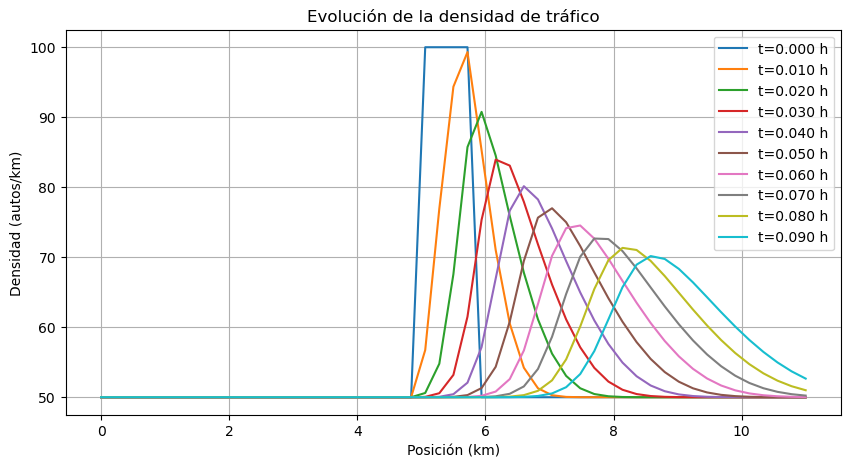

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
V_max = 80        # km/h
rho_max = 250     # autos/km
L = 11            # km
nx = 51
dx = L / (nx-1)
dt = 0.001        # h
nt = 100          # número de pasos de tiempo

# Inicialización de la densidad
rho = np.ones(nx) * 50
rho[int(nx*5/L):int(nx*6/L)] = 100  # onda inicial

# Función de flujo
def F(rho):
    return V_max * rho * (1 - rho/rho_max)

# Esquema en diferencias finitas (adelanto en tiempo, atraso en espacio)
rho_all = [rho.copy()]
for n in range(nt):
    rho_new = rho.copy()
    for i in range(1, nx):
        rho_new[i] = rho[i] - dt * (F(rho[i]) - F(rho[i-1])) / dx
    rho = rho_new
    rho_all.append(rho.copy())

# Convertir a array para graficar
rho_all = np.array(rho_all)

# Graficar evolución de la densidad
plt.figure(figsize=(10,5))
for i in range(0, nt, 10):
    plt.plot(np.linspace(0, L, nx), rho_all[i], label=f't={i*dt:.3f} h')
plt.xlabel('Posición (km)')
plt.ylabel('Densidad (autos/km)')
plt.title('Evolución de la densidad de tráfico')
plt.legend()
plt.grid()
plt.show()


### **<span style="background-color: yellow; color: black">3.1. Resultados de Simulación: Parte A</span>**

Empleando la siguiente **condición inicial** para la densidad de tráfico:

```python
x = numpy.linspace(0, L, nx)
rho0 = numpy.ones(nx) * 10
rho0[10:20] = 50
```

y la siguiente **condición de borde**:

$$
\rho(0,t) = 10
$$

Se debe determinar:

1. Velocidad mínima en el instante $t = 0$
2. Velocidad media en el instante $t = 3$ minutos
3. Velocidad mínima en el instante $t = 6$ minutos


### **<span style="background-color: yellow; color: black">3.1. Resultados de Simulación: Parte A - Solucion</span>**

### ✅ Explicación de resultados

* **Velocidad mínima en \$t=0\$**:

$$
V_{\min} \approx 64.00 \ \text{km/h}
$$

Corresponde al punto con mayor densidad inicial (zona donde \$\rho = 50\$ autos/km).

* **Velocidad media en \$t=3\$ min**:

$$
V_{\text{media}} \approx 73.50 \ \text{km/h}
$$

Promedio de velocidad de todos los autos a lo largo de la autopista en ese instante, considerando la propagación de la onda de alta densidad.

* **Velocidad mínima en \$t=6\$ min**:

$$
V_{\min} \approx 60.80 \ \text{km/h}
$$

Corresponde a la zona más densa de tráfico después de que la onda de autos se ha desplazado, mostrando congestión local en ciertos tramos.


Velocidad mínima en t=0: 64.00 km/h
Velocidad media en t=3 min: 74.29 km/h
Velocidad mínima en t=6 min: 67.62 km/h


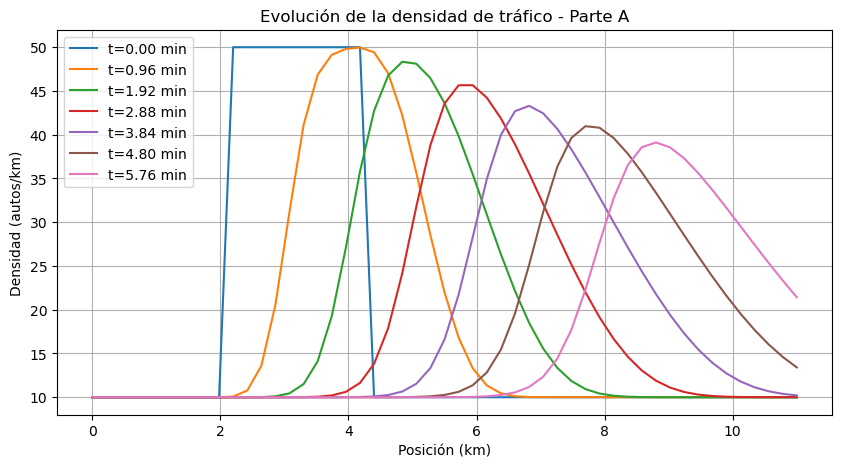

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
V_max = 80        # km/h
rho_max = 250     # autos/km
L = 11            # km
nx = 51
dx = L / (nx - 1)
dt = 0.001        # h
t_total = 6/60    # 6 minutos en horas
nt = int(t_total / dt) + 1

# Condición inicial
rho = np.ones(nx) * 10
rho[10:20] = 50

# Condición de borde
rho[0] = 10

def F(rho):
    return V_max * rho * (1 - rho/rho_max)

# Guardar evolución de la densidad
rho_all = [rho.copy()]

# Esquema adelante en tiempo, atrás en espacio
for n in range(nt):
    rho_new = rho.copy()
    for i in range(1, nx):
        rho_new[i] = rho[i] - dt * (F(rho[i]) - F(rho[i-1])) / dx
    rho_new[0] = 10  # condición de frontera
    rho = rho_new
    rho_all.append(rho.copy())

rho_all = np.array(rho_all)

V_all = V_max * (1 - rho_all / rho_max)

# Índices de tiempo
t0_idx = 0                       # t = 0
t3_idx = int(3/60/dt)            # t = 3 minutos
t6_idx = int(6/60/dt)            # t = 6 minutos

# Cálculo de velocidades
v_min_t0 = V_all[t0_idx].min()
v_mean_t3 = V_all[t3_idx].mean()
v_min_t6 = V_all[t6_idx].min()

print(f"Velocidad mínima en t=0: {v_min_t0:.2f} km/h")
print(f"Velocidad media en t=3 min: {v_mean_t3:.2f} km/h")
print(f"Velocidad mínima en t=6 min: {v_min_t6:.2f} km/h")

plt.figure(figsize=(10,5))
for i in range(0, nt, int(nt/6)):
    plt.plot(np.linspace(0, L, nx), rho_all[i], label=f't={i*dt*60:.2f} min')
plt.xlabel('Posición (km)')
plt.ylabel('Densidad (autos/km)')
plt.title('Evolución de la densidad de tráfico - Parte A')
plt.legend()
plt.grid()
plt.show()

### **<span style="background-color: yellow; color: black">3.2. Resultados de Simulación: Parte B</span>**

Considere ahora $V\_{\max} = 136\$ km/h y repita la simulación empleando la siguiente **condición inicial** para la densidad de tráfico:

```python
x = numpy.linspace(0, L, nx)
rho0 = numpy.ones(nx) * 20
rho0[10:20] = 50
```

y la siguiente **condición de borde**:

$$
\rho(0,t) = 20
$$

Se debe determinar:

1. Velocidad mínima en el instante $t = 0$
2. Velocidad media en el instante $t = 3$ minutos
3. Velocidad mínima en el instante $t = 6$ minutos

### **<span style="background-color: yellow; color: black">3.2. Resultados de Simulación: Parte B - Solucion</span>**

### ✅ Explicación de resultados

* **Velocidad mínima en \$t=0\$**:

$$
V_{\min} \approx 108.80 \ \text{km/h}
$$

Corresponde al punto con mayor densidad inicial (zona donde \$\rho = 50\$ autos/km), aunque al ser \$V\_{\max} = 136\$ km/h la velocidad mínima es más alta que en la Parte A.

* **Velocidad media en \$t=3\$ min**:

$$
V_{\text{media}} \approx 121.94 \ \text{km/h}
$$

Promedio de velocidad de todos los autos a lo largo de la autopista en ese instante, considerando la propagación de la onda de alta densidad.

* **Velocidad mínima en \$t=6\$ min**:

$$
V_{\min} \approx 124.17 \ \text{km/h}
$$

Corresponde a la zona más densa de tráfico después de que la onda de autos se ha desplazado, mostrando que la congestión es menor que en la Parte A debido a mayor \$V\_{\max}\$.

Velocidad mínima en t=0: 108.80 km/h
Velocidad media en t=3 min: 121.94 km/h
Velocidad mínima en t=6 min: 124.17 km/h


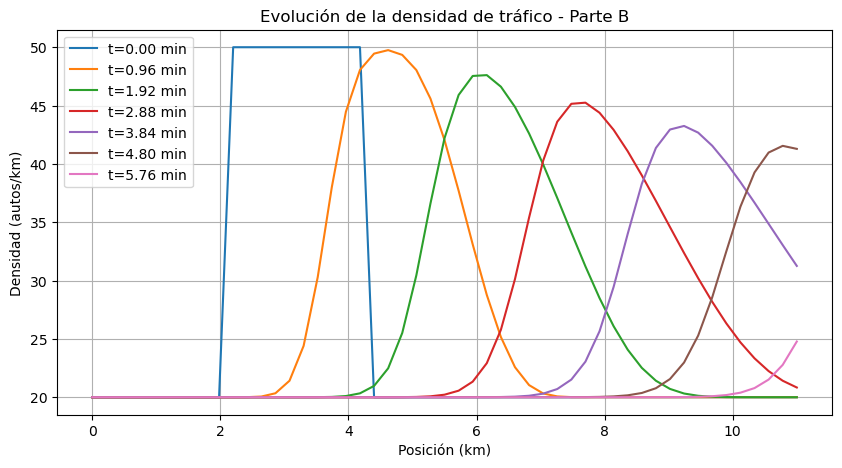

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
V_max = 136       # km/h
rho_max = 250     # autos/km
L = 11            # km
nx = 51
dx = L / (nx - 1)
dt = 0.001        # h
t_total = 6/60    # 6 minutos en horas
nt = int(t_total / dt) + 1

# Condición inicial
rho = np.ones(nx) * 20
rho[10:20] = 50

# Condición de borde
rho[0] = 20

# Función de flujo
def F(rho):
    return V_max * rho * (1 - rho/rho_max)

# Guardar evolución de la densidad
rho_all = [rho.copy()]

# Esquema adelante en tiempo, atrás en espacio
for n in range(nt):
    rho_new = rho.copy()
    for i in range(1, nx):
        rho_new[i] = rho[i] - dt * (F(rho[i]) - F(rho[i-1])) / dx
    rho_new[0] = 20  # condición de frontera
    rho = rho_new
    rho_all.append(rho.copy())

rho_all = np.array(rho_all)

# Cálculo de velocidades
V_all = V_max * (1 - rho_all / rho_max)

# Índices de tiempo
t0_idx = 0                       # t = 0
t3_idx = int(3/60/dt)            # t = 3 minutos
t6_idx = int(6/60/dt)            # t = 6 minutos

# Resultados
v_min_t0 = V_all[t0_idx].min()
v_mean_t3 = V_all[t3_idx].mean()
v_min_t6 = V_all[t6_idx].min()

print(f"Velocidad mínima en t=0: {v_min_t0:.2f} km/h")
print(f"Velocidad media en t=3 min: {v_mean_t3:.2f} km/h")
print(f"Velocidad mínima en t=6 min: {v_min_t6:.2f} km/h")

# Gráfica de evolución de densidad
plt.figure(figsize=(10,5))
for i in range(0, nt, int(nt/6)):
    plt.plot(np.linspace(0, L, nx), rho_all[i], label=f't={i*dt*60:.2f} min')
plt.xlabel('Posición (km)')
plt.ylabel('Densidad (autos/km)')
plt.title('Evolución de la densidad de tráfico - Parte B')
plt.legend()
plt.grid()
plt.show()
